# Препроцессинг датасета

In [18]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

In [19]:
data = pd.read_csv("Laptop_price.csv")
data.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


In [20]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


## Heatmap

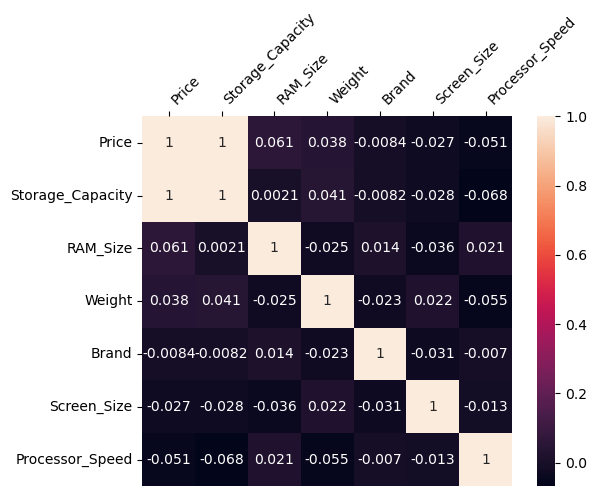

In [21]:
le = LabelEncoder()
data["Brand"] = le.fit_transform(data["Brand"])
cols = data.corr().nlargest(data.shape[1], "Price").index
cm = np.corrcoef(data[cols].values.T)
hm = sns.heatmap(
    cm, annot=True, square=True, yticklabels=cols.values, xticklabels=cols.values
)
hm.xaxis.tick_top()
plt.xticks(rotation=45, ha="left")
plt.show()

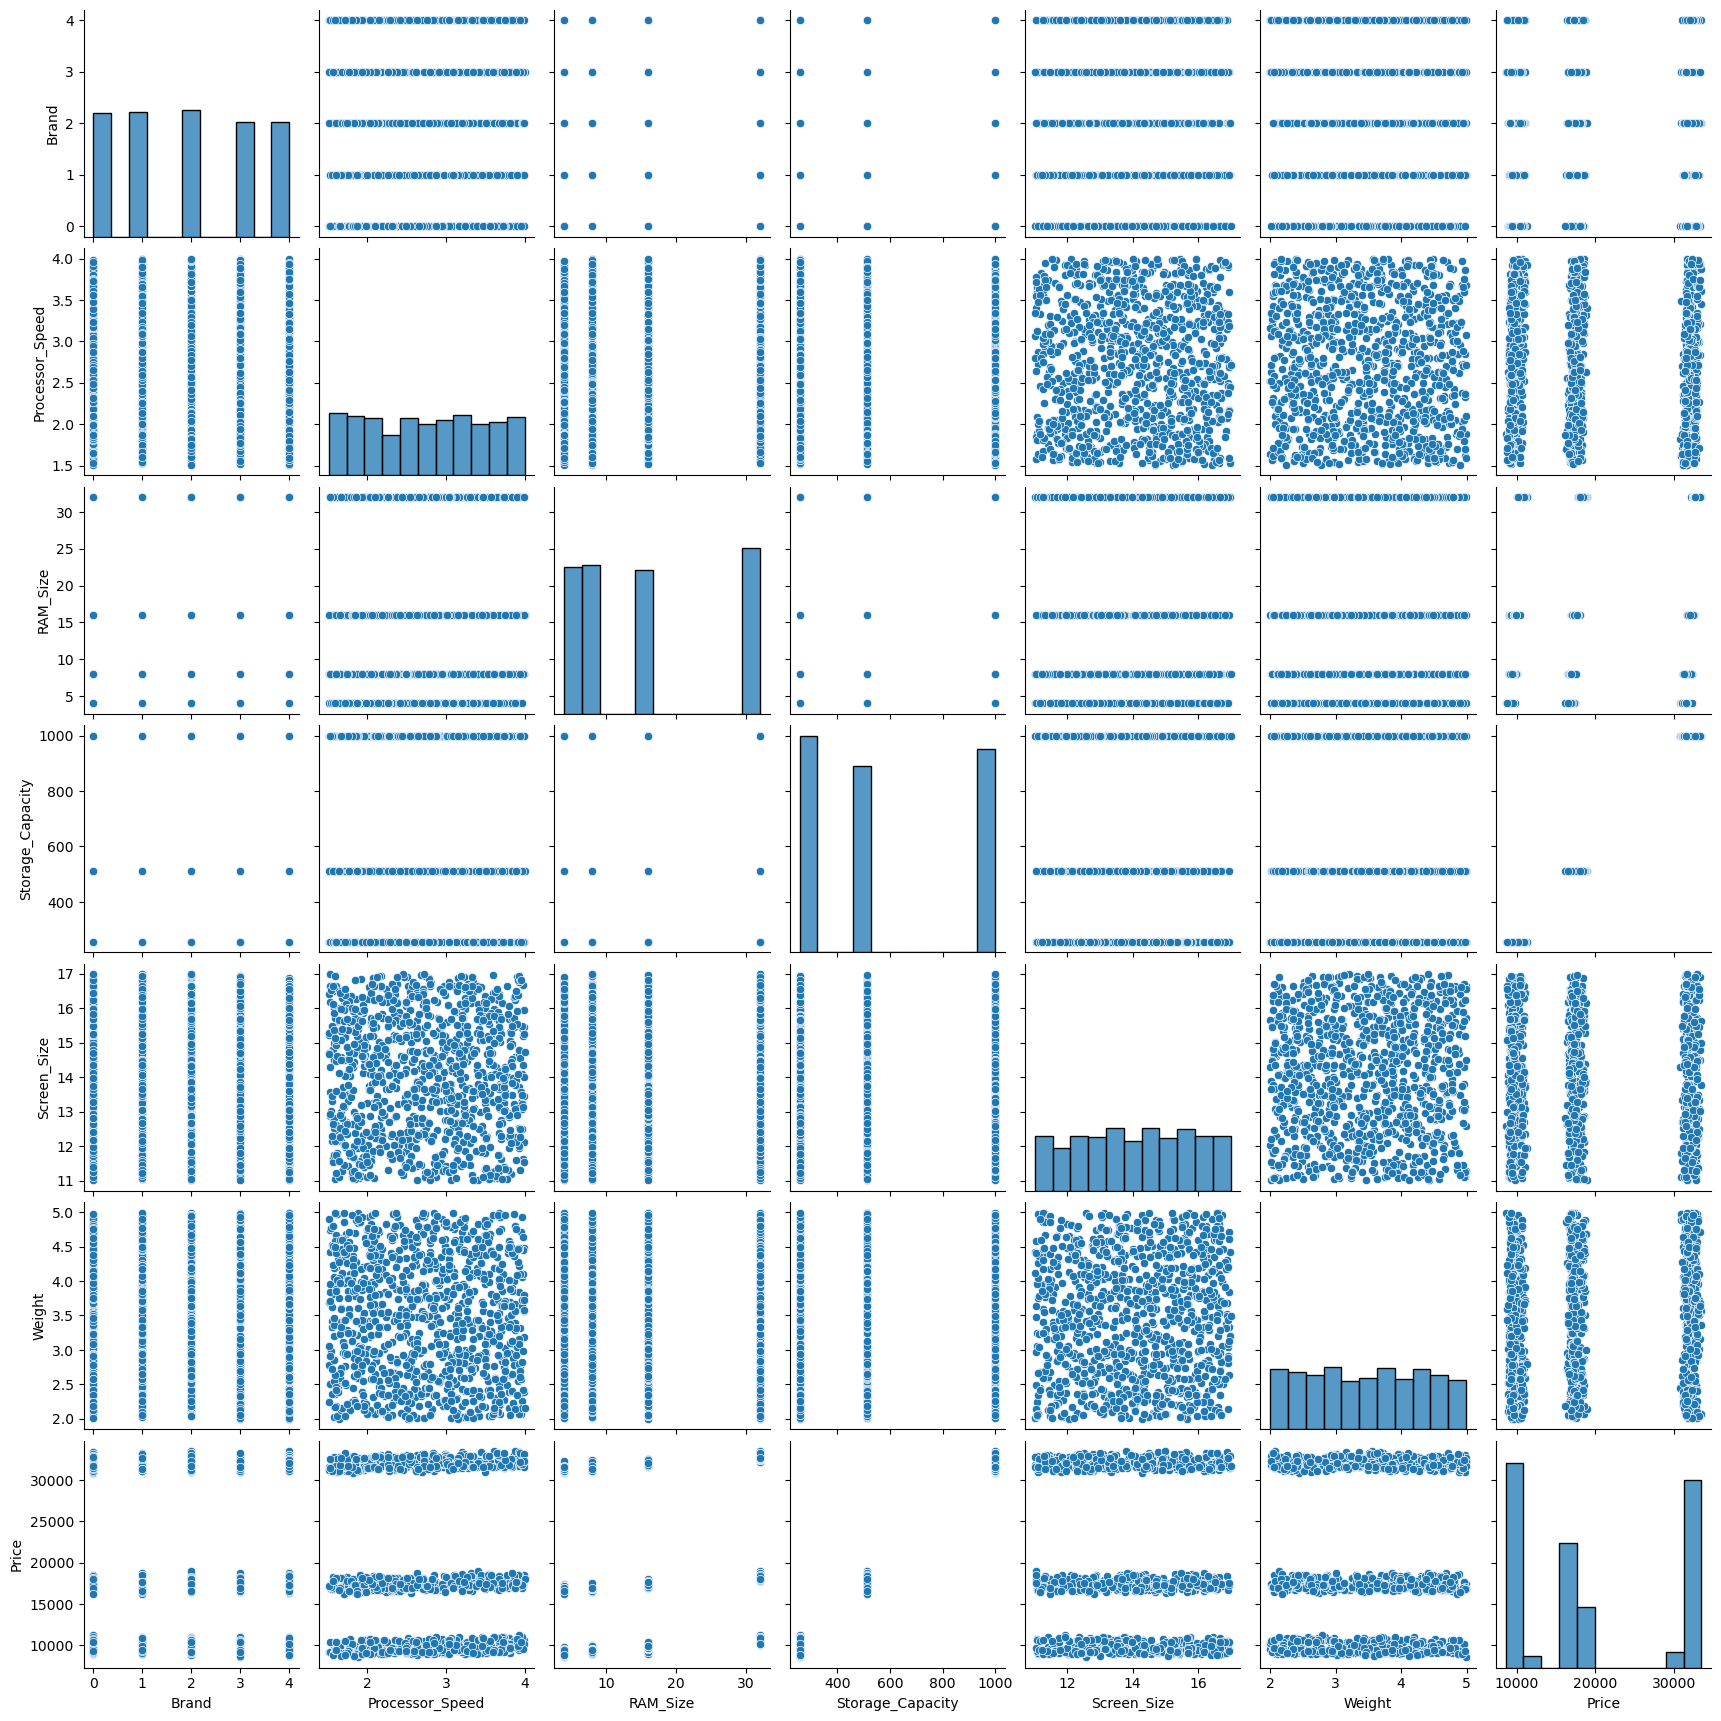

In [22]:
sns.pairplot(data)

## Gain ratio

- Entropy
$$E(S) = - \sum^{N}_{i = 1} p_i \log_2 p_i$$

- Information gain
$$IG(T, a) = E(T) - E(T | a) = E(T) - \sum_{v \in values} \frac{|T_v|}{|T|} E(T_v)$$

- Split information
$$SplitInformation(X) = - \sum^{N}_{i = 1} \frac{N(x_i)}{N(x_i)} \log_2 \frac{N(x_i)}{N(x_i)}$$

- Gain ratio
$$GR(T, a) = \frac{IG(T, a)}{SplitInformation(T)}$$

In [23]:
def entropy(column: str) -> float:
    _, counts = np.unique(column, return_counts=True)
    probabilities = counts / len(column)

    return -np.sum(probabilities * np.log2(probabilities))


def gain_ratio(data: pd.DataFrame, target: str, attribute: str) -> float:
    entropy_before = entropy(data[target])
    entropy_after = 0
    split_info = 0

    for value in data[attribute].unique():
        subset = data[data[attribute] == value]
        subset_entropy = entropy(subset[target])
        entropy_after += (len(subset) / len(data)) * subset_entropy

    information_gain = entropy_before - entropy_after
    split_info = entropy(data[attribute])

    if split_info == 0:
        return 0
    else:
        return information_gain / split_info

In [24]:
data["Price_category"] = pd.qcut(data["Price"], q=3, labels=["Low", "Medium", "High"])
data = data.drop("Price", axis=1)
for column in data.columns:
    print("{0} = {1}".format(column, gain_ratio(data, "Price_category", column)))

Brand = 0.003028607961208953
Processor_Speed = 0.15904027352324282
RAM_Size = 0.00518144022202595
Storage_Capacity = 0.9083104888695972
Screen_Size = 0.15904027352324282
Weight = 0.15904027352324282
Price_category = 1.0
